## This file contains the code we used for training our models 

### Loading the Dataset:

In [105]:
from sodapy import Socrata
import pandas as pd

# App token and Socrata client setup
app_token = "6u2VWw6NyixoG5uL7TqcBr1Np"
client = Socrata("data.sfgov.org", app_token)

# Dataset identifier and initial setup for fetching data
dataset_identifier = "2zdj-bwza"
limit = 2000000  # Target number of records
offset = 0
all_results = []
chunk_counter = 0

while len(all_results) < limit:
    try:
        results = client.get(dataset_identifier, limit=50000, offset=offset)
        if not results:
            break
        all_results.extend(results)
        offset += len(results)
        chunk_counter += 1
        print(f"Chunk {chunk_counter} fetched, total records: {len(all_results)}")
    except Exception as e:
        print(f"An error occurred: {e}")
        break

# Convert the results into a pandas DataFrame
data = pd.DataFrame.from_records(all_results)

data['received_datetime'] = pd.to_datetime(data['received_datetime'])
data['year'] = data['received_datetime'].dt.year

# Filter for data from the year 2023
data_2023 = data[data['year'] == 2023]

# Optionally save and display the filtered data
print(data_2023.head())


data = data_2023
data.head()


Chunk 1 fetched, total records: 50000
Chunk 2 fetched, total records: 100000
Chunk 3 fetched, total records: 150000
Chunk 4 fetched, total records: 200000
Chunk 5 fetched, total records: 250000
Chunk 6 fetched, total records: 300000
Chunk 7 fetched, total records: 350000
Chunk 8 fetched, total records: 400000
Chunk 9 fetched, total records: 450000
Chunk 10 fetched, total records: 500000
Chunk 11 fetched, total records: 550000
Chunk 12 fetched, total records: 600000
Chunk 13 fetched, total records: 650000
Chunk 14 fetched, total records: 700000
Chunk 15 fetched, total records: 750000
Chunk 16 fetched, total records: 800000
Chunk 17 fetched, total records: 850000
Chunk 18 fetched, total records: 900000
Chunk 19 fetched, total records: 950000
Chunk 20 fetched, total records: 1000000
Chunk 21 fetched, total records: 1050000
Chunk 22 fetched, total records: 1100000
Chunk 23 fetched, total records: 1150000
Chunk 24 fetched, total records: 1200000
Chunk 25 fetched, total records: 1250000
Chun

,cad_number,received_datetime,entry_datetime,dispatch_datetime,enroute_datetime,onscene_datetime,close_datetime,call_type_original,call_type_original_desc,call_type_final,...,analysis_neighborhood,police_district,:@computed_region_jwn9_ihcz,:@computed_region_6qbp_sg9q,:@computed_region_qgnn_b9vv,:@computed_region_26cr_cadq,:@computed_region_ajp5_b2md,call_type_original_notes,call_type_final_notes,year
8,231883169,2023-07-07 21:22:05,2023-07-07T21:22:05.000,2023-07-07T21:22:05.000,2023-07-07T21:22:05.000,2023-07-07T21:22:05.000,2023-07-07T23:11:42.000,418DV,FIGHT NO WEAPON DV,418DV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
9,231421538,2023-05-22 12:44:40,2023-05-22T12:44:40.000,2023-05-22T12:44:40.000,2023-05-22T12:44:40.000,2023-05-22T12:44:40.000,2023-05-22T13:19:59.000,1096,SURVEILLANCE,1096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
26,230402211,2023-02-09 15:24:15,2023-02-09T15:27:36.000,2023-02-09T16:25:12.000,2023-02-09T16:25:12.000,2023-02-09T17:40:55.000,2023-02-09T17:46:36.000,261,SEXUAL ASSAULT ADULT,261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
34,230112076,2023-01-11 16:04:20,2023-01-11T16:04:20.000,2023-01-11T16:04:20.000,2023-01-11T16:04:20.000,2023-01-11T16:04:20.000,2023-01-11T16:10:24.000,000,MISC,106P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
37,231530265,2023-06-02 03:39:28,2023-06-02T03:40:37.000,2023-06-02T03:41:25.000,2023-06-02T03:41:25.000,2023-06-02T03:46:42.000,2023-06-02T03:58:11.000,418,FIGHT NO WEAPON,418DV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


### Filtering the data to only the year of 2023

In [107]:
data = data_2023
data = data.drop([':@computed_region_jwn9_ihcz',':@computed_region_6qbp_sg9q',':@computed_region_qgnn_b9vv',':@computed_region_26cr_cadq',':@computed_region_ajp5_b2md','pd_incident_report','intersection_name','intersection_point','dup_cad_number','source_filename','data_as_of','data_updated_at','data_loaded_at','disposition','agency','sensitive_call','onview_flag','priority_original','call_type_original_desc','enroute_datetime','entry_datetime','call_type_final','call_type_original','call_type_original_notes','call_type_final_notes','close_datetime','dispatch_datetime'],axis = 1)

# Convert 'received_datetime' to datetime
data['received_datetime'] = pd.to_datetime(data['received_datetime'])
data['onscene_datetime'] = pd.to_datetime(data['onscene_datetime'])

# Function to categorize time of day
def categorize_time_of_day(hour):
    if 8 <= hour < 16:
        return 'A'
    elif 16 <= hour <= 23:
        return 'B'
    else:
        return 'C'


#response time in minutes
data['response_time_minutes'] = (data['onscene_datetime'] - data['received_datetime']).dt.total_seconds() / 60

# Apply function to create a new time category column
data['time_of_day'] = data['received_datetime'].dt.hour.apply(categorize_time_of_day)
data.head()


,cad_number,received_datetime,onscene_datetime,call_type_final_desc,priority_final,intersection_id,supervisor_district,analysis_neighborhood,police_district,year,response_time_minutes,time_of_day
8,231883169,2023-07-07 21:22:05,2023-07-07 21:22:05,FIGHT NO WEAPON DV,B,NaN,NaN,NaN,NaN,2023,0.000000,B
9,231421538,2023-05-22 12:44:40,2023-05-22 12:44:40,SURVEILLANCE,B,NaN,NaN,NaN,NaN,2023,0.000000,A
26,230402211,2023-02-09 15:24:15,2023-02-09 17:40:55,SEXUAL ASSAULT ADULT,B,NaN,NaN,NaN,NaN,2023,136.666667,A
34,230112076,2023-01-11 16:04:20,2023-01-11 16:04:20,Postings,B,NaN,NaN,NaN,NaN,2023,0.000000,B
37,231530265,2023-06-02 03:39:28,2023-06-02 03:46:42,FIGHT NO WEAPON DV,A,NaN,NaN,NaN,NaN,2023,7.233333,C


In [108]:
data.to_csv('main_dataset.csv',index = False)

####  Grouping the data into getting incident counts of the police districts and their respective neighborhoods

In [58]:
# Group by district and neighborhood, then aggregate
neighborhood_summary = data.groupby(['police_district', 'analysis_neighborhood']).agg({
    'response_time_minutes': 'mean',  # Average response time in minutes
    'cad_number': 'count'  # Count of incidents as incident count
}).reset_index()


neighborhood_summary.rename(columns={
    'response_time_minutes': 'average_response_time',
    'cad_number': 'incident_count'
}, inplace=True)
neighborhood_summary.to_csv('neighborhood_summary.csv', index=False)
neighborhood_summary.head()

,police_district,analysis_neighborhood,average_response_time,incident_count
0,BAYVIEW,Bayview Hunters Point,24.516648,971
1,BAYVIEW,Bernal Heights,5.850000,1
2,BAYVIEW,Excelsior,74.858685,93
3,BAYVIEW,McLaren Park,106.864789,93
4,BAYVIEW,Portola,37.623222,339


In [16]:
# Grouping by month along with district and neighborhood
data['month'] = data['received_datetime'].dt.to_period('M')
neighborhood_time_series = data.groupby(['police_district', 'analysis_neighborhood', 'month']).agg({
    'response_time_minutes': 'mean',
    'cad_number': 'count'
}).reset_index()

neighborhood_time_series.rename(columns={
    'response_time_minutes': 'average_response_time',
    'cad_number': 'incident_count'
}, inplace=True)


data.head()

,cad_number,received_datetime,onscene_datetime,call_type_final_desc,priority_final,intersection_id,supervisor_district,analysis_neighborhood,police_district,year,response_time_minutes,time_of_day,month
8,231883169,2023-07-07 21:22:05,2023-07-07 21:22:05,FIGHT NO WEAPON DV,B,NaN,NaN,NaN,NaN,2023,0.000000,Night,2023-07
9,231421538,2023-05-22 12:44:40,2023-05-22 12:44:40,SURVEILLANCE,B,NaN,NaN,NaN,NaN,2023,0.000000,Day,2023-05
26,230402211,2023-02-09 15:24:15,2023-02-09 17:40:55,SEXUAL ASSAULT ADULT,B,NaN,NaN,NaN,NaN,2023,136.666667,Day,2023-02
34,230112076,2023-01-11 16:04:20,2023-01-11 16:04:20,Postings,B,NaN,NaN,NaN,NaN,2023,0.000000,Day,2023-01
37,231530265,2023-06-02 03:39:28,2023-06-02 03:46:42,FIGHT NO WEAPON DV,A,NaN,NaN,NaN,NaN,2023,7.233333,Night,2023-06


In [70]:
# Create a subset of the data with unique district-neighborhood pairs
unique_district_neighborhoods = data[['police_district', 'analysis_neighborhood']].drop_duplicates()
# Now, each district and neighborhood is in its own row
unique_district_neighborhoods.to_csv('districtneighborhoods.csv', index=False)


##### Code for the K-means clustering and then training our RandomForestRegressor model on the monthly incidents, to predict how many incidents happen per a given month, also getting the MSE and RMSE, R^2 value for the model

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV



data['received_datetime'] = pd.to_datetime(data['received_datetime'])

# Group by district, neighborhood, and month, then count incidents
monthly_data = data.groupby(['police_district', 'analysis_neighborhood', 
                             data['received_datetime'].dt.to_period('M')]).agg({
    'cad_number': 'count'  
}).reset_index()

monthly_data.rename(columns={'received_datetime': 'month', 'cad_number': 'incident_count'}, inplace=True)

# Create a complete range of months in 2023
all_months = pd.period_range(start='2023-01', end='2023-12', freq='M')

# Ensure each group has all months
# Create MultiIndex for reindexing
complete_index = pd.MultiIndex.from_product(
    [monthly_data['police_district'].unique(), 
     monthly_data['analysis_neighborhood'].unique(), 
     all_months],
    names=['police_district', 'analysis_neighborhood', 'month'])

# Set the current index for reindexing
monthly_data.set_index(['police_district', 'analysis_neighborhood', 'month'], inplace=True)

# Reindex and fill missing values
monthly_data_complete = monthly_data.reindex(complete_index, fill_value=0).reset_index()

# Normalize the incident counts
scaler = StandardScaler()
monthly_data_complete['normalized_incidents'] = scaler.fit_transform(monthly_data_complete[['incident_count']])


# Convert 'month' to numerical format for modeling, ensuring 'month' is of datetime type
monthly_data_complete['month'] = monthly_data_complete['month'].astype('period[M]')
monthly_data_complete['month_encoded'] = monthly_data_complete['month'].dt.month

# Clustering - using K-means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
monthly_data_complete['cluster'] = kmeans.fit_predict(monthly_data_complete[['normalized_incidents']])

# Define features and target
X = monthly_data_complete[['month_encoded', 'cluster', 'normalized_incidents']]
y = monthly_data_complete['incident_count']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}



# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validated MSE: ", best_score)

# Train the model with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict and evaluate the model on the test set
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R-squared:", r2)



Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2

###### Code for the K-means clustering and then training our RandomForestRegressor model on the hourly incidents, to predict how many incidents happen per a given month, also getting the MSE and RMSE, R^2 value for the model

In [104]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


data['received_datetime'] = pd.to_datetime(data['received_datetime'])
data['time_of_day'] = data['received_datetime'].dt.hour  # Extract hour for time of day analysis

# Group by district, neighborhood, and time of day, then count incidents
time_of_day_data = data.groupby(['police_district', 'analysis_neighborhood', 'time_of_day']).agg({
    'cad_number': 'count'  # Count of incidents
}).reset_index()

# Rename columns for clarity
time_of_day_data.rename(columns={'cad_number': 'incident_count'}, inplace=True)


# Normalize the incident counts
scaler = StandardScaler()
time_of_day_data['normalized_incidents'] = scaler.fit_transform(time_of_day_data[['incident_count']])

# Clustering -  K-means choice of 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
time_of_day_data['cluster'] = kmeans.fit_predict(time_of_day_data[['normalized_incidents']])

time_of_day_data['time_of_day'] = pd.Categorical(time_of_day_data['time_of_day'])

# Define features and target
X = time_of_day_data[['time_of_day', 'cluster', 'normalized_incidents']]
y = time_of_day_data['incident_count']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print("Best grid search param: ",best_params)
print("Best grid search score: ",best_score)
print("Best cross-validated MSE: ", best_score)

# Train the model with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict and evaluate the model on the test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R-squared:", r2)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2

Saving the Model, and the modified dataset for use in frontend

In [103]:
time_of_day_data.to_csv('tod.csv',index=False)
from joblib import dump, load

dump(best_rf, 'tod_rf_model.joblib')
dump(scaler, 'tod_scaler.joblib')


['tod_scaler.joblib']

In [61]:
import pandas as pd
from joblib import dump, load

dump(best_rf, 'tod_rf_model.joblib')



['rf_model.joblib']

In [62]:
dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [59]:
monthly_data_complete.to_csv('data.csv',index=False)

#### Saving monthly incident count data

In [76]:
monthly_data = data.groupby([
    'police_district', 'analysis_neighborhood', 
    data['received_datetime'].dt.to_period('M')  # Convert datetime to month period
]).agg({
    'cad_number': 'count'  # Count of incidents
}).reset_index()

# Rename the period column correctly after reset_index
monthly_data.rename(columns={'received_datetime': 'month', 'cad_number': 'incident_count'}, inplace=True)

# Create a complete range of months in 2023
all_months = pd.period_range(start='2023-01', end='2023-12', freq='M')

# Create a list to hold all tuples for the MultiIndex
index_tuples = []

# Loop through unique district-neighborhood pairs and add all month combinations
for _, row in monthly_data[['police_district', 'analysis_neighborhood']].drop_duplicates().iterrows():
    for month in all_months:
        index_tuples.append((row['police_district'], row['analysis_neighborhood'], month))

# Create a MultiIndex from the list of tuples
complete_index = pd.MultiIndex.from_tuples(index_tuples, names=['police_district', 'analysis_neighborhood', 'month'])

# Set the current index for reindexing
monthly_data.set_index(['police_district', 'analysis_neighborhood', 'month'], inplace=True)

# Reindex and fill missing values
monthly_data_complete = monthly_data.reindex(complete_index, fill_value=0).reset_index()

# Normalize the incident counts
scaler = StandardScaler()
monthly_data_complete['normalized_incidents'] = scaler.fit_transform(monthly_data_complete[['incident_count']])

# Convert 'month' to numerical format for modeling, ensuring 'month' is of datetime type
monthly_data_complete['month_encoded'] = monthly_data_complete['month'].dt.month

# Apply clustering within each district
monthly_data_complete['cluster'] = -1  # Initialize with -1 or any suitable default value

for district in monthly_data_complete['police_district'].unique():
    # Filter data for the district
    district_data = monthly_data_complete[monthly_data_complete['police_district'] == district]
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=5, random_state=0)
    monthly_data_complete.loc[district_data.index, 'cluster'] = kmeans.fit_predict(district_data[['normalized_incidents']])
monthly_data_complete.head()
monthly_data_complete.to_csv('data2.csv',index=False)


##### Calculating value for district based on the ratio of how many incident occur to the average response time to determine how police should be allocated

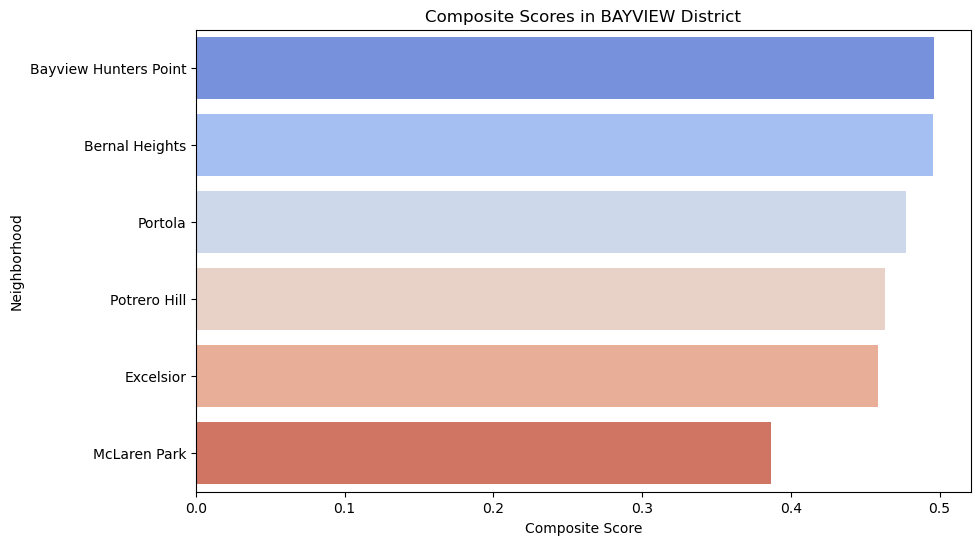

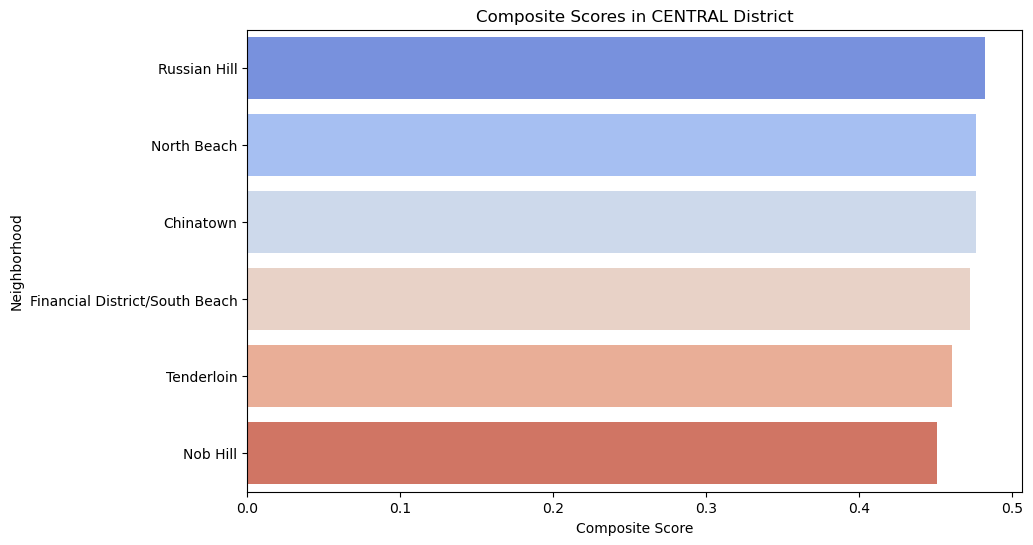

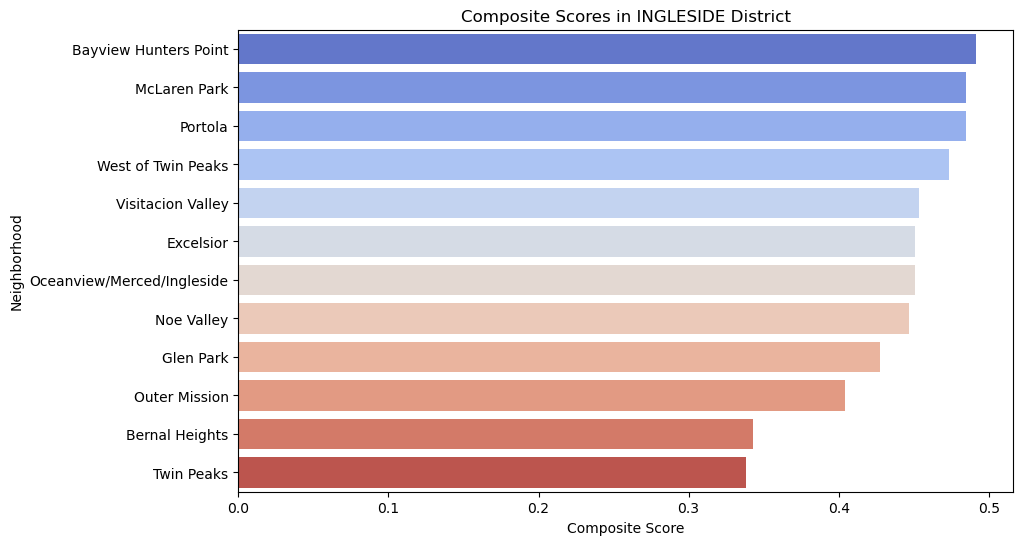

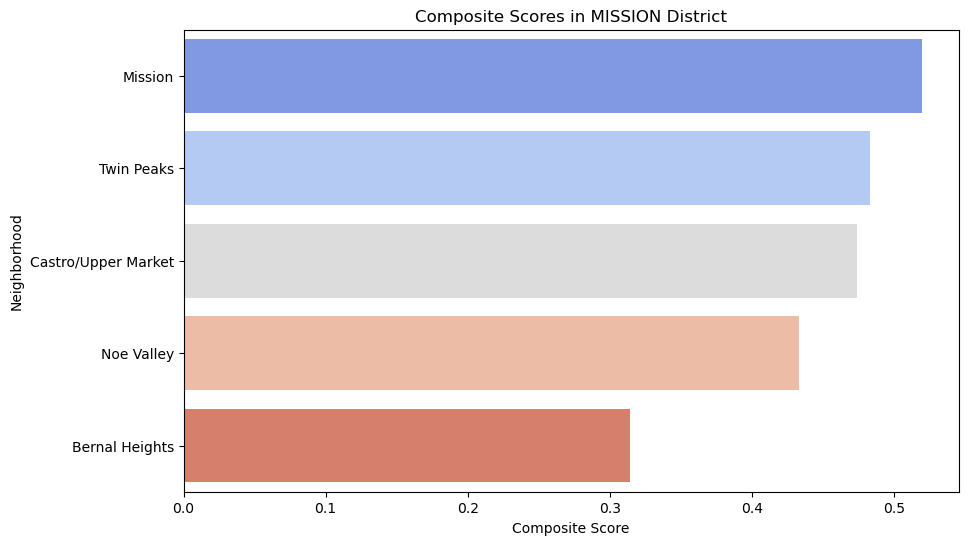

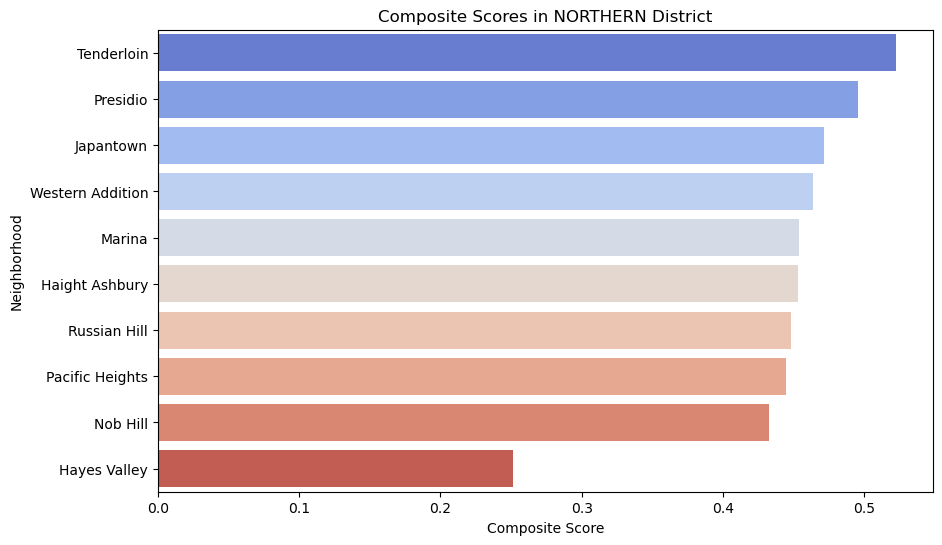

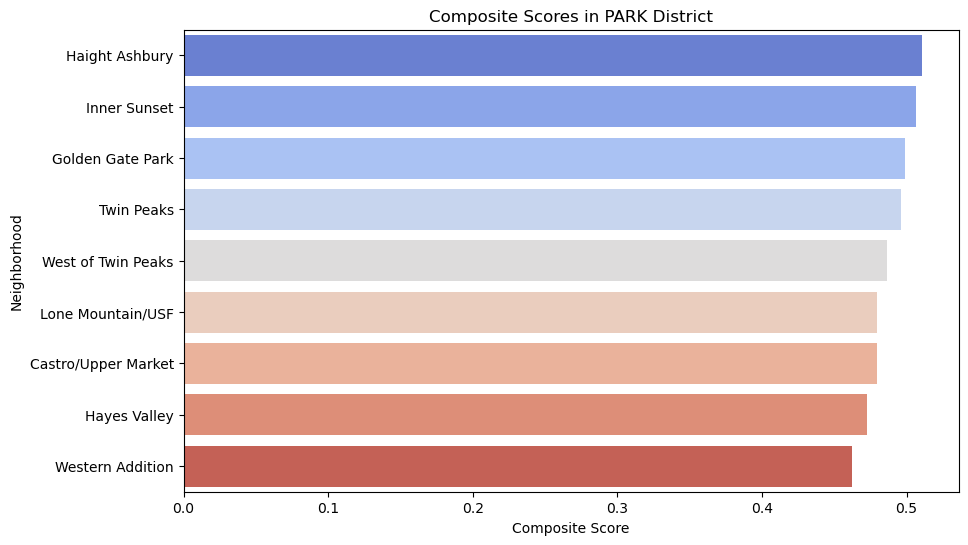

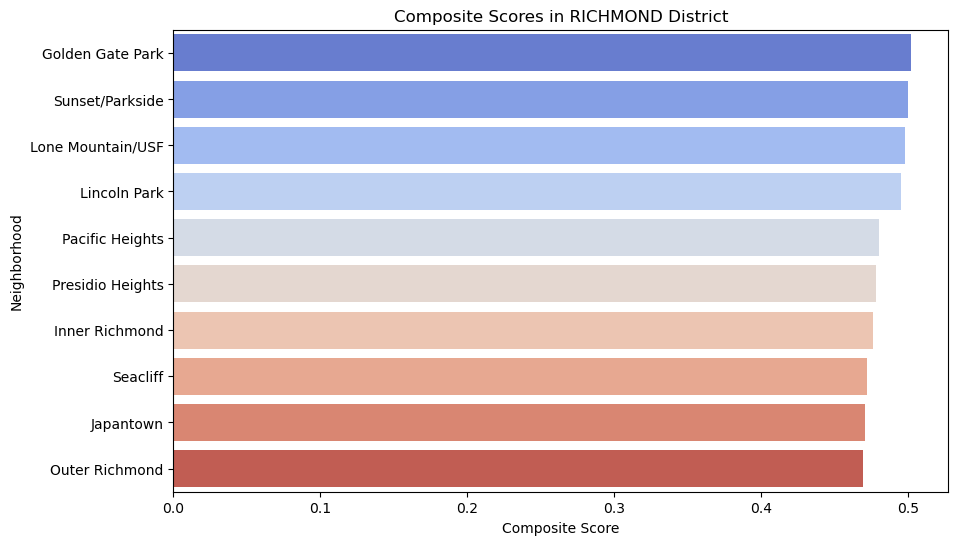

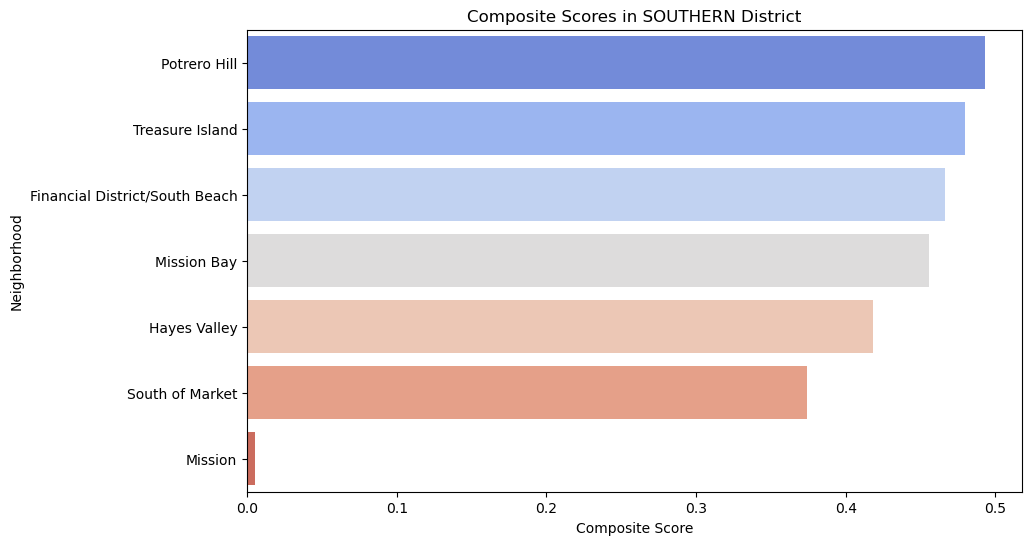

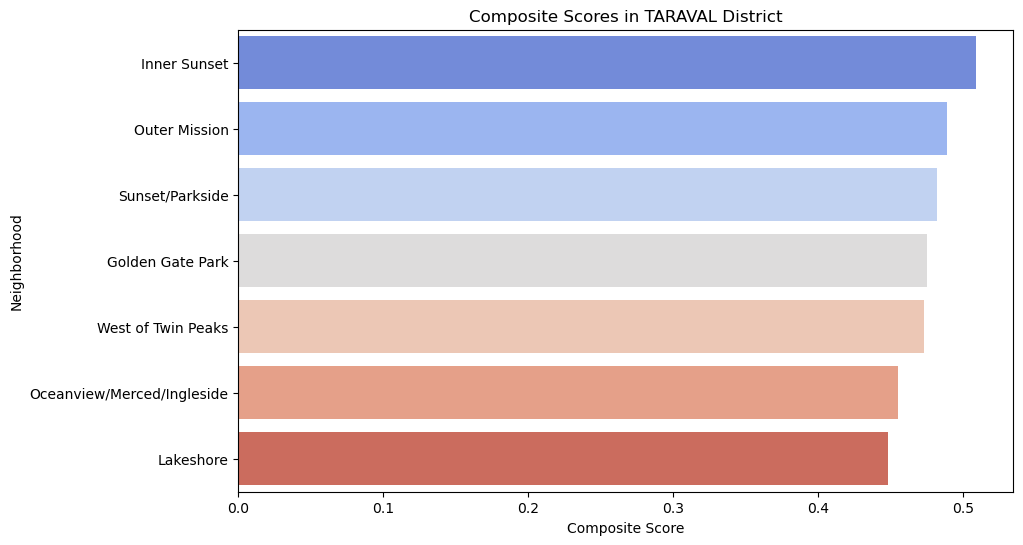

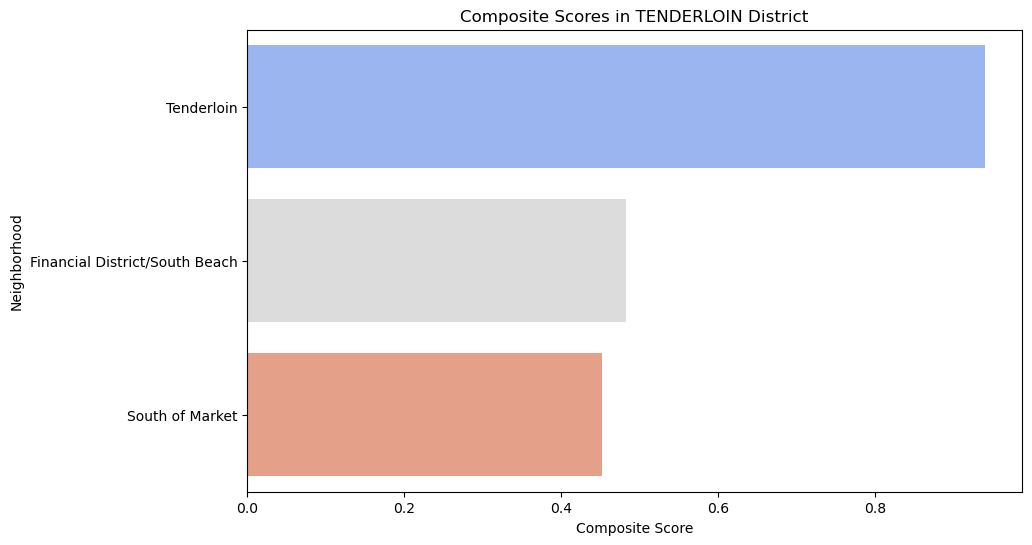

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
neighborhood_summary['normalized_incidents'] = scaler.fit_transform(neighborhood_summary[['incident_count']])
neighborhood_summary['normalized_response'] = scaler.fit_transform(neighborhood_summary[['average_response_time']])

weight_for_incidents = 0.5
weight_for_response_time = 0.5

# Normalize both incident count and response time
max_incidents = neighborhood_summary['incident_count'].max()
max_response_time = neighborhood_summary['average_response_time'].max()

neighborhood_summary['normalized_incidents'] = neighborhood_summary['incident_count'] / max_incidents
neighborhood_summary['normalized_response_time'] = neighborhood_summary['average_response_time'] / max_response_time

# Calculate a composite score
neighborhood_summary['composite_score'] = (weight_for_incidents * neighborhood_summary['normalized_incidents']) \
                                          + (weight_for_response_time * (1 - neighborhood_summary['normalized_response_time']))


# Sort neighborhoods within each district by composite score in descending order
neighborhood_summary.sort_values(by=['police_district', 'composite_score'], ascending=[True, False], inplace=True)
import seaborn as sns
import matplotlib.pyplot as plt


# Get unique districts
districts = neighborhood_summary['police_district'].unique()

# Create a plot for each district
for district in districts:
    # Filter data for the specific district
    district_data = neighborhood_summary[neighborhood_summary['police_district'] == district]
    
    # Sort the data by composite score to make the plot more informative
    district_data = district_data.sort_values(by='composite_score', ascending=False)
    
    # Initialize the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='composite_score', y='analysis_neighborhood', data=district_data, palette='coolwarm')
    
    # Adding titles and labels
    plt.title(f'Composite Scores in {district} District')
    plt.xlabel('Composite Score')
    plt.ylabel('Neighborhood')
    
    # Show plot
    plt.show()


